In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
import ppscore

In [2]:
#importing cleaned df from data wrangling
df = pd.read_csv(r'C:\Users\colem\OneDrive\Documents\Springboard\Disaster_Project\disaster_df_wrangled.csv')
df.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength
0,5429,TX,FM,2022,Fire,BIG L FIRE,0,0,1,1,2022/03/20,2022/03/30,Hood (County),10.0
1,5428,TX,FM,2022,Fire,WHEAT FIELD FIRE,0,0,1,1,2022/03/17,2022/03/30,Eastland (County),13.0
2,5427,TX,FM,2022,Fire,KIDD FIRE,0,0,1,1,2022/03/17,2022/03/30,Eastland (County),13.0
3,5422,TX,FM,2022,Fire,NORTH 207 FIRE,0,0,1,1,2021/12/15,2021/12/19,Carson (County),4.0
4,5420,TX,FM,2022,Fire,COUNTY LINE FIRE,0,0,1,1,2021/12/10,2021/12/12,Wichita (County),2.0


In [3]:
#check on data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53350 entries, 0 to 53349
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   disasterNumber     53350 non-null  int64  
 1   state              53350 non-null  object 
 2   declarationType    53350 non-null  object 
 3   fyDeclared         53350 non-null  int64  
 4   incidentType       53350 non-null  object 
 5   declarationTitle   53350 non-null  object 
 6   ihProgramDeclared  53350 non-null  int64  
 7   iaProgramDeclared  53350 non-null  int64  
 8   paProgramDeclared  53350 non-null  int64  
 9   hmProgramDeclared  53350 non-null  int64  
 10  incidentBeginDate  53350 non-null  object 
 11  incidentEndDate    53350 non-null  object 
 12  designatedArea     53350 non-null  object 
 13  incidentLength     53350 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.7+ MB


In [4]:
#adjusting data types to the appropriate type
df['incidentBeginDate']= pd.to_datetime(df['incidentBeginDate'])
df['incidentEndDate']= pd.to_datetime(df['incidentEndDate'])
df['state']=df['state'].astype('str')
df['declarationType']=df['declarationType'].astype('str')
df['incidentType']=df['incidentType'].astype('str')
df['declarationTitle']=df['declarationTitle'].astype('str')
df['designatedArea']=df['designatedArea'].astype('str')
df['incidentLength']=df['incidentLength'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53350 entries, 0 to 53349
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   disasterNumber     53350 non-null  int64         
 1   state              53350 non-null  object        
 2   declarationType    53350 non-null  object        
 3   fyDeclared         53350 non-null  int64         
 4   incidentType       53350 non-null  object        
 5   declarationTitle   53350 non-null  object        
 6   ihProgramDeclared  53350 non-null  int64         
 7   iaProgramDeclared  53350 non-null  int64         
 8   paProgramDeclared  53350 non-null  int64         
 9   hmProgramDeclared  53350 non-null  int64         
 10  incidentBeginDate  53350 non-null  datetime64[ns]
 11  incidentEndDate    53350 non-null  datetime64[ns]
 12  designatedArea     53350 non-null  object        
 13  incidentLength     53350 non-null  int32         
dtypes: dat

In [5]:
#sorting by incident begin date
df.sort_values(by = "incidentBeginDate", inplace=True)
df = df.reset_index(drop = True)
df.head()

,disasterNumber,state,declarationType,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,designatedArea,incidentLength
0,1,GA,DR,1953,Tornado,TORNADO,0,1,1,1,1953-05-02,1953-05-02,Statewide,0
1,2,TX,DR,1953,Tornado,TORNADO & HEAVY RAINFALL,0,1,1,1,1953-05-15,1953-05-15,Statewide,0
2,3,LA,DR,1953,Flood,FLOOD,0,1,1,1,1953-05-29,1953-05-29,Statewide,0
3,4,MI,DR,1953,Tornado,TORNADO,0,1,1,1,1953-06-02,1953-06-02,Statewide,0
4,5,MT,DR,1953,Flood,FLOODS,0,1,1,1,1953-06-06,1953-06-06,Statewide,0


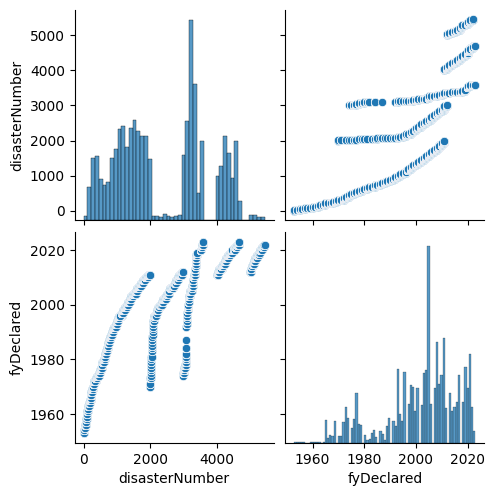

In [6]:
sns.pairplot(df[['disasterNumber','fyDeclared','incidentType']]);

<function matplotlib.pyplot.show(close=None, block=None)>

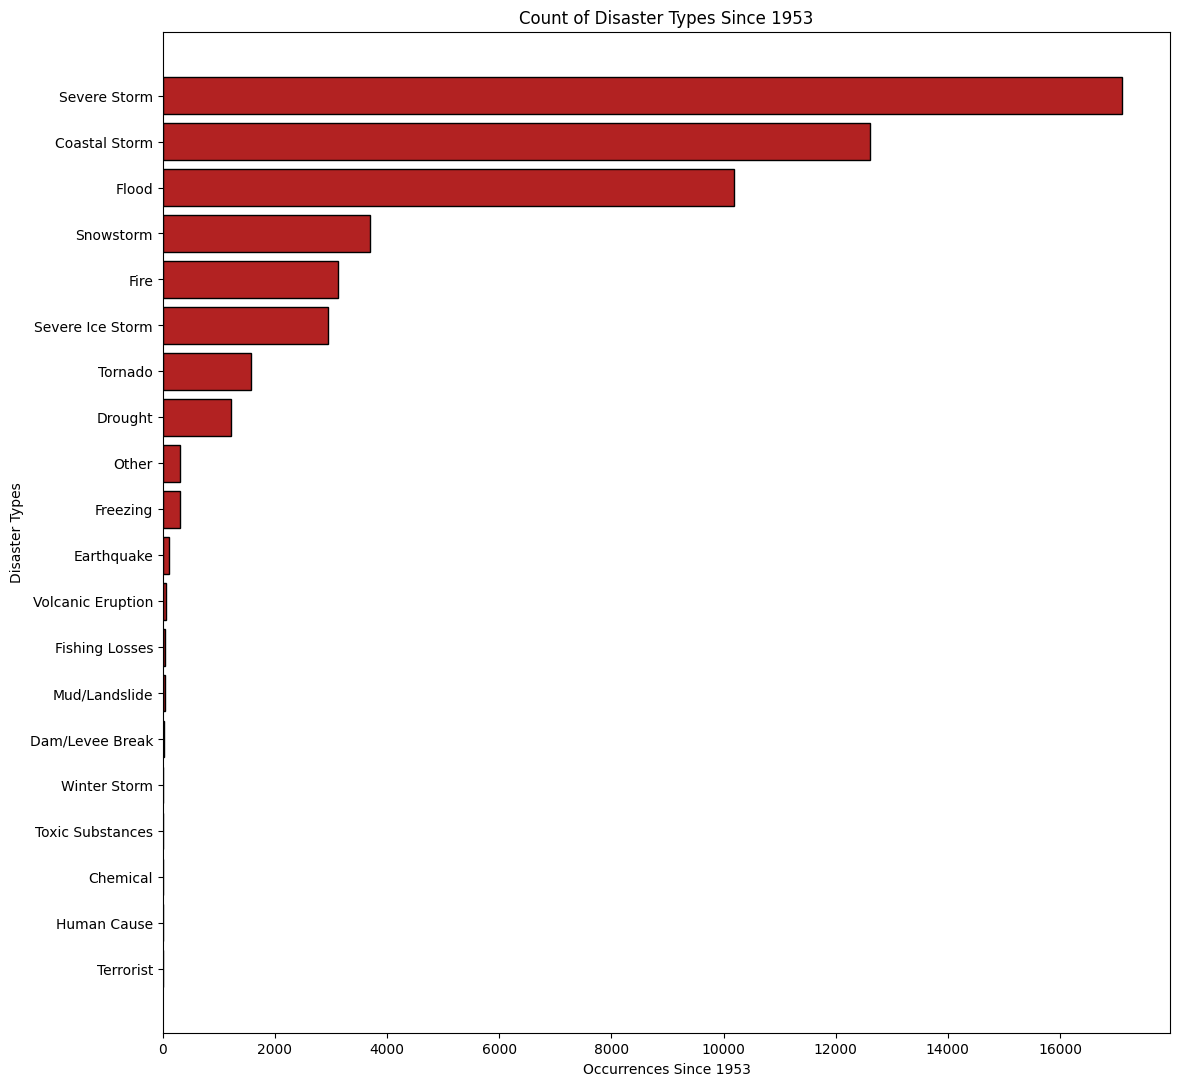

In [7]:
#quick glance at disaster type count
fig, ax = plt.subplots(figsize=(13,13))  
value_counts_incident = df['incidentType'].value_counts()
plt.barh(value_counts_incident.index, value_counts_incident.values, edgecolor = 'black', color = 'firebrick')
ax.set_ylabel('Disaster Types')
ax.set_xlabel('Occurrences Since 1953')
ax.set_title('Count of Disaster Types Since 1953')
plt.gca().invert_yaxis()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

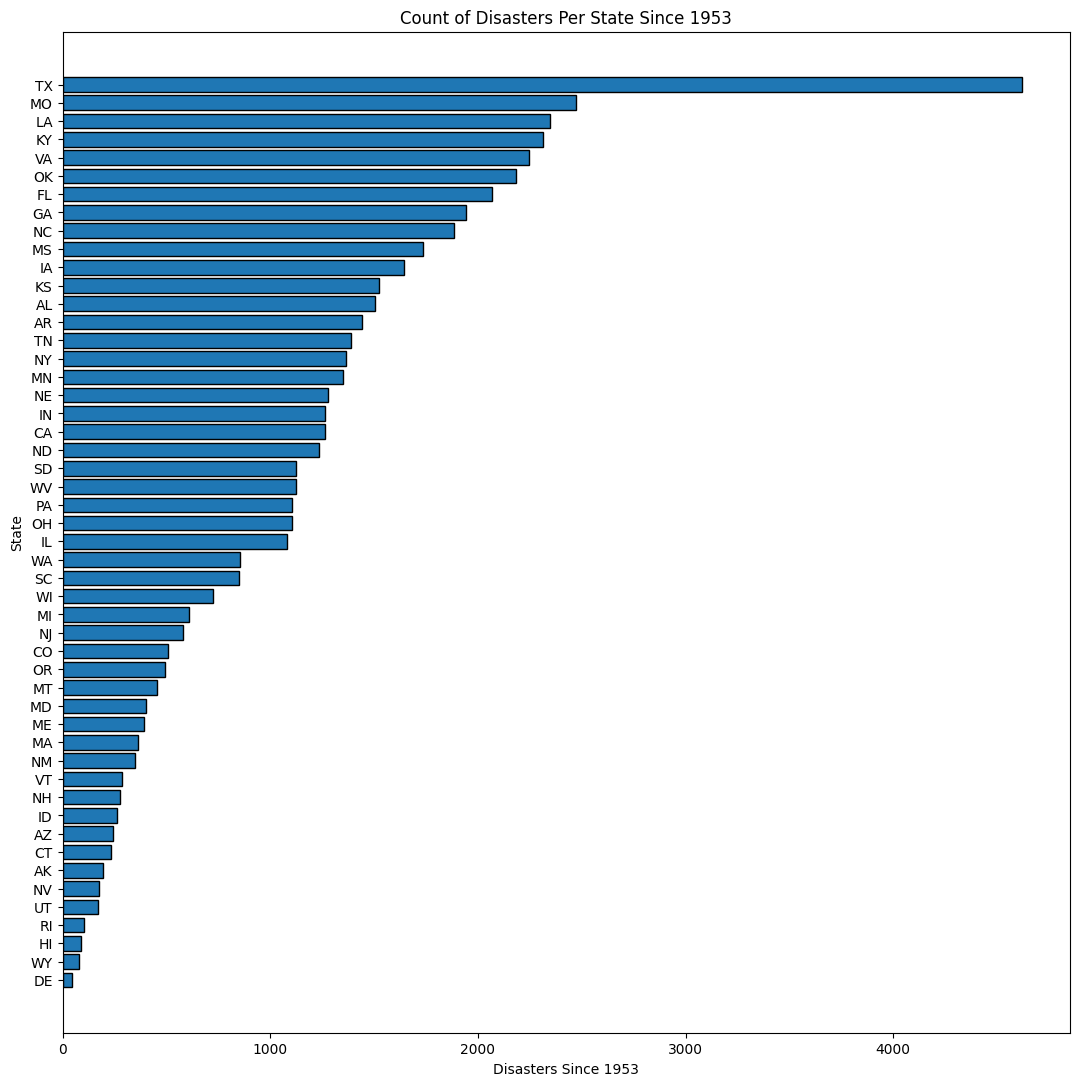

In [8]:
#quick glance at state disaster count
fig, ax = plt.subplots(figsize=(13,13))  
value_counts_state = df['state'].value_counts()
plt.barh(value_counts_state.index, value_counts_state.values, edgecolor = 'black')
ax.set_ylabel('State')
ax.set_xlabel('Disasters Since 1953')
ax.set_title('Count of Disasters Per State Since 1953')
plt.gca().invert_yaxis()
plt.show

In [9]:
#creating dataframe s_i to look at state and incident type
s_i=df[['state','incidentType']].groupby('state').describe()
s_i['incidentType'].sort_values(by='freq',ascending=False).head(15)

,count,unique,top,freq
state,,,,
LA,2349,9,Coastal Storm,1568
TX,4620,9,Coastal Storm,1345
MO,2474,7,Severe Storm,1339
NC,1884,9,Coastal Storm,1304
FL,2068,8,Coastal Storm,1291
KS,1523,8,Severe Storm,1030
OK,2184,8,Severe Storm,1005
KY,2313,9,Severe Storm,999
GA,1941,9,Coastal Storm,905


In [10]:
#look at inital spread of disaster types. DR = "Major Disaster", EM = "Emergency Management", FM = "Fire Management"
df['declarationType'].value_counts()

DR    37531
EM    14438
FM     1381
Name: declarationType, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

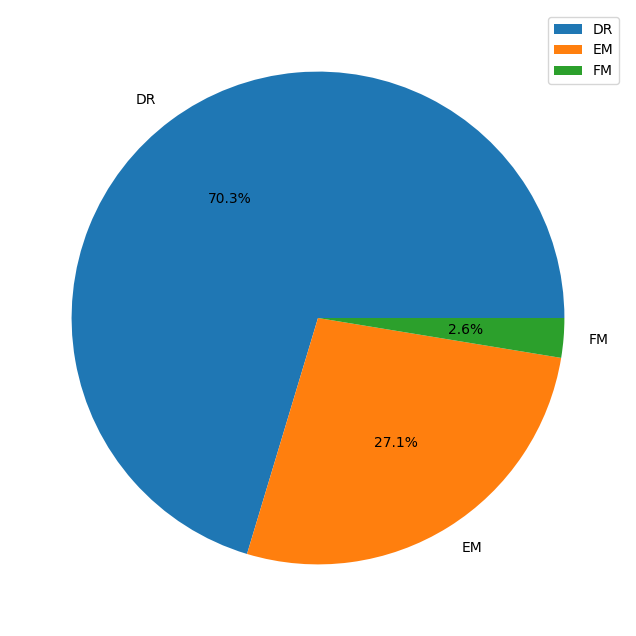

In [11]:
fig, ax = plt.subplots(figsize=(8,8))  
value_counts_declaration = df['declarationType'].value_counts()
plt.pie(value_counts_declaration.values, labels = value_counts_declaration.index, autopct='%1.1f%%')
ax.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

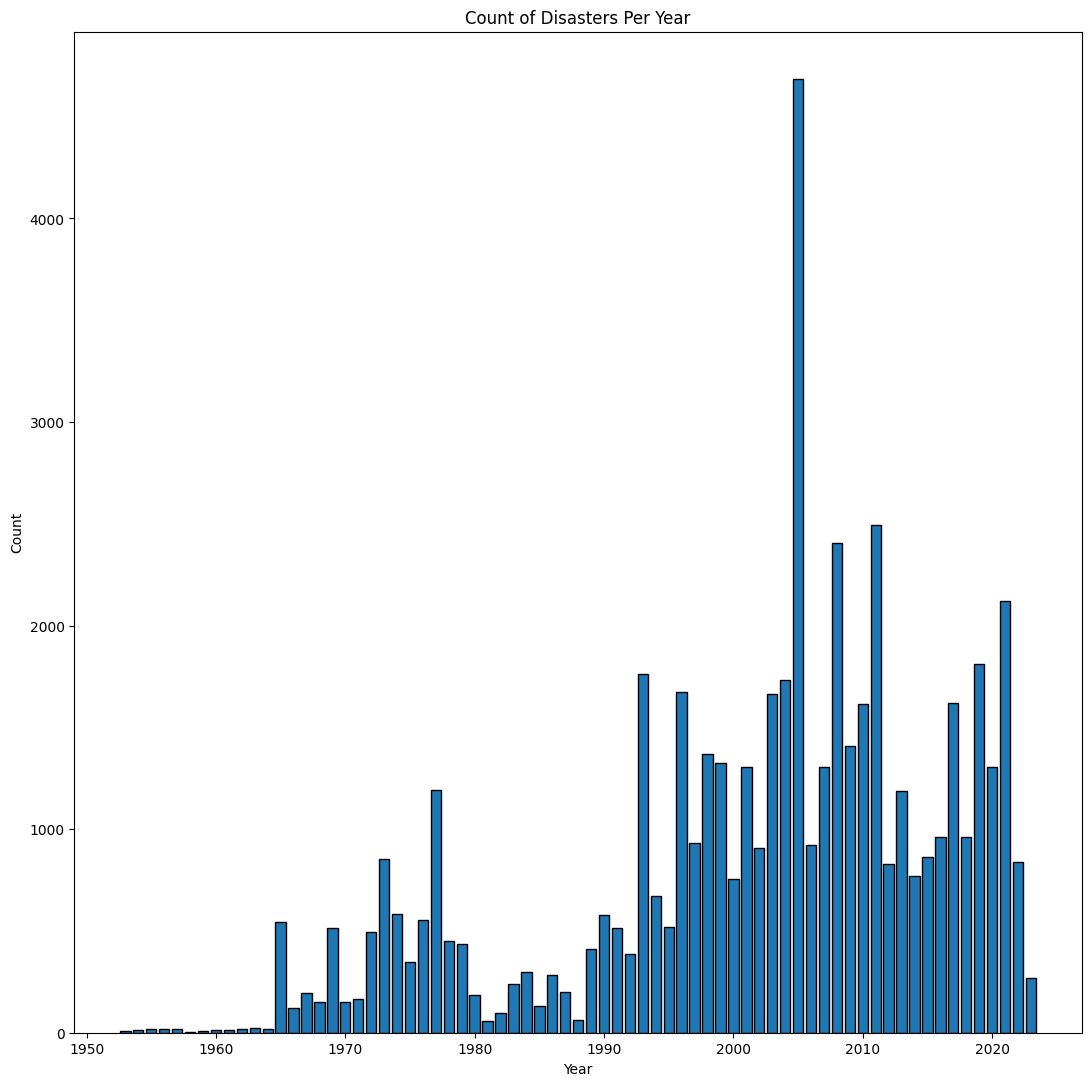

In [12]:
#quick glance at state disaster count
fig, ax = plt.subplots(figsize=(13,13))  
value_counts_year = df['fyDeclared'].value_counts()
plt.bar(value_counts_year.index, value_counts_year.values, edgecolor = 'black')
ax.set_ylabel('Count')
ax.set_xlabel('Year')
ax.set_title('Count of Disasters Per Year')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

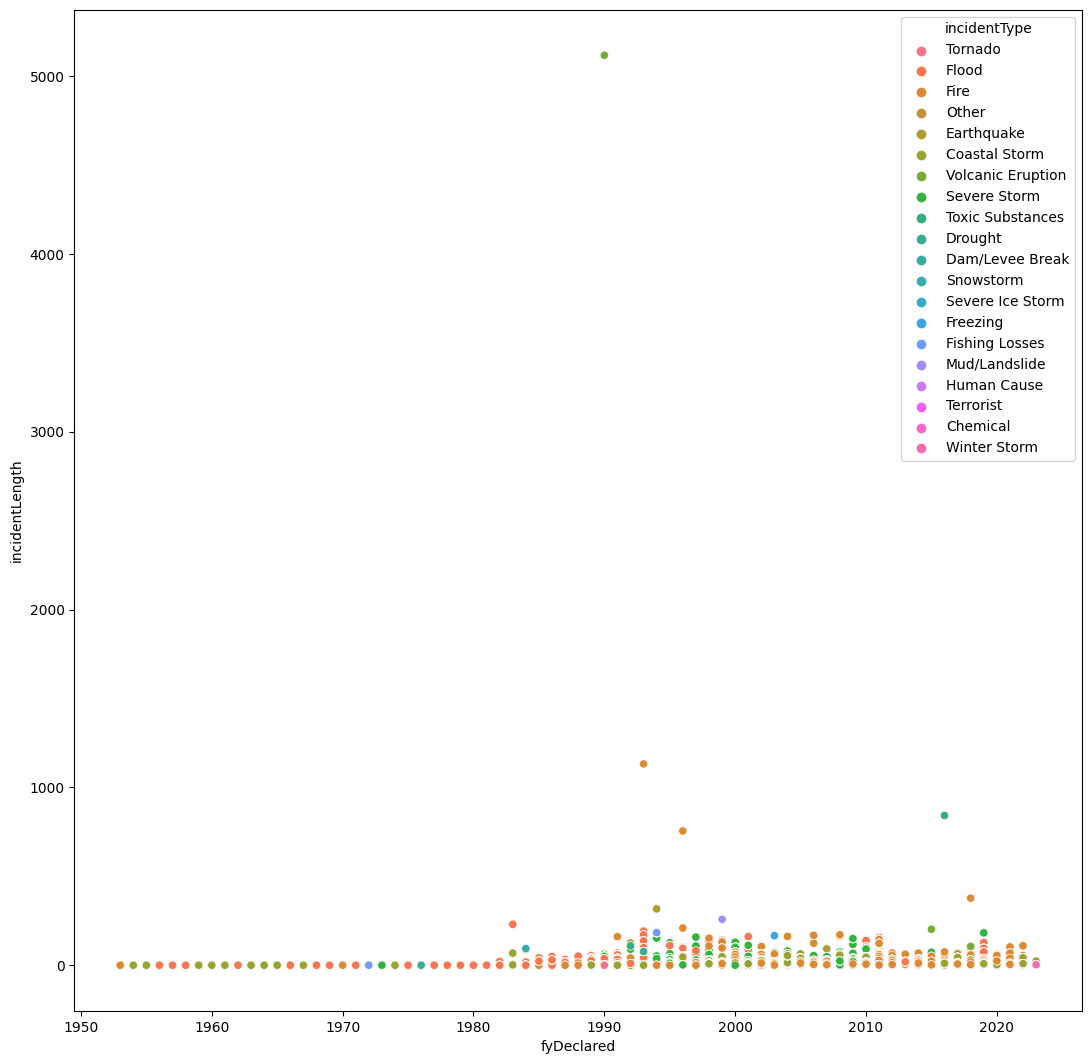

In [13]:
fig, ax = plt.subplots(figsize=(13,13))  
#plt.hist(df['incidentLength'], bins = [0,1,7,30,90,365], edgecolor = 'black')
sns.scatterplot(data = df, y = df['incidentLength'], x = df['fyDeclared'], hue = df['incidentType'])
plt.show

In [14]:
#checking which incidents have an incident type other
incidentType_other = df[df['incidentType']=='Other']
incidentType_other['declarationTitle'].value_counts()

POWER OUTAGE                                        97
WEST NILE VIRUS                                     82
LOSS OF THE SPACE SHUTTLE COLUMBIA                  54
LOSS OF SPACE SHUTTLE COLUMBIA                      41
STRAIGHT-LINE WINDS                                  5
WATER MAIN BREAK                                     4
SEVERE HARDSHIP                                      3
EXPLOSION                                            3
DEBRUCE GRAIN ELEVATOR EXPLOSION  (SEDGWICK CTY)     2
MAJOR WATER MAIN BREAK                               2
WIND STORM                                           1
HIGH WINDS                                           1
POWER FAILURE                                        1
SEISMIC SEA WAVE                                     1
BRIDGE COLLAPSE                                      1
TIDAL WAVES                                          1
SEVERE WEATHER CONDITIONS                            1
TIDAL WAVE                                           1
SURFSIDE B

In [15]:
#loop this
#df['incidentType'] = df['declarationTitle'].replace(['Other'], 'Coastal Storm')

In [16]:
incidentType_other = df[df['incidentType']=='Other']
incidentType_other['declarationTitle'].value_counts()

POWER OUTAGE                                        97
WEST NILE VIRUS                                     82
LOSS OF THE SPACE SHUTTLE COLUMBIA                  54
LOSS OF SPACE SHUTTLE COLUMBIA                      41
STRAIGHT-LINE WINDS                                  5
WATER MAIN BREAK                                     4
SEVERE HARDSHIP                                      3
EXPLOSION                                            3
DEBRUCE GRAIN ELEVATOR EXPLOSION  (SEDGWICK CTY)     2
MAJOR WATER MAIN BREAK                               2
WIND STORM                                           1
HIGH WINDS                                           1
POWER FAILURE                                        1
SEISMIC SEA WAVE                                     1
BRIDGE COLLAPSE                                      1
TIDAL WAVES                                          1
SEVERE WEATHER CONDITIONS                            1
TIDAL WAVE                                           1
SURFSIDE B

In [17]:
pps = ppscore.matrix(df)

C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least popula

C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least popula

In [18]:
pps.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,disasterNumber,disasterNumber,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,disasterNumber,state,0.815911,classification,True,weighted F1,0.031600,0.821728,DecisionTreeClassifier()
2,disasterNumber,declarationType,0.998535,classification,True,weighted F1,0.580398,0.999385,DecisionTreeClassifier()
3,disasterNumber,fyDeclared,0.995971,regression,True,mean absolute error,10.771400,0.043400,DecisionTreeRegressor()
4,disasterNumber,incidentType,0.909168,classification,True,weighted F1,0.208200,0.928079,DecisionTreeClassifier()


In [19]:
matrix_df = ppscore.matrix(df).pivot(columns='x', index='y', values='ppscore')

C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least popula

C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least popula

In [20]:
matrix_df

x,declarationTitle,declarationType,designatedArea,disasterNumber,fyDeclared,hmProgramDeclared,iaProgramDeclared,ihProgramDeclared,incidentBeginDate,incidentEndDate,incidentLength,incidentType,paProgramDeclared,state
y,,,,,,,,,,,,,,
declarationTitle,1.000000,0.005734,0.005675,0.859873,0.169917,3.624337e-03,2.377752e-03,0.000000e+00,0.726983,0.759726,0.199139,0.105047,0.000000e+00,0.040807
declarationType,0.679763,1.000000,0.053920,0.998535,0.403963,1.158329e-07,1.158329e-07,1.158329e-07,0.703912,0.671473,0.311036,0.500473,1.158329e-07,0.033124
designatedArea,0.000474,0.001016,1.000000,0.006703,0.000776,0.000000e+00,0.000000e+00,0.000000e+00,0.003925,0.004890,0.000000,0.000117,0.000000e+00,0.005508
disasterNumber,0.597714,0.258732,0.000000,1.000000,0.632705,0.000000e+00,3.278110e-01,0.000000e+00,0.866985,0.865089,0.181893,0.174724,2.742874e-02,0.024318
fyDeclared,0.661200,0.000000,0.000000,0.995971,1.000000,1.324576e-01,1.401531e-01,0.000000e+00,0.997899,0.997583,0.357362,0.157254,0.000000e+00,0.000000
hmProgramDeclared,0.528051,0.201983,0.000000,0.949065,0.368736,1.000000e+00,0.000000e+00,5.178409e-02,0.696242,0.691213,0.128614,0.051068,0.000000e+00,0.000000
iaProgramDeclared,0.467433,0.000000,0.000000,0.790938,0.275472,0.000000e+00,1.000000e+00,0.000000e+00,0.718715,0.724396,0.000000,0.000000,0.000000e+00,0.000000
ihProgramDeclared,0.000000,0.000000,0.000000,0.325028,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,0.086313,0.117408,0.000000,0.000000,0.000000e+00,0.000000
incidentBeginDate,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

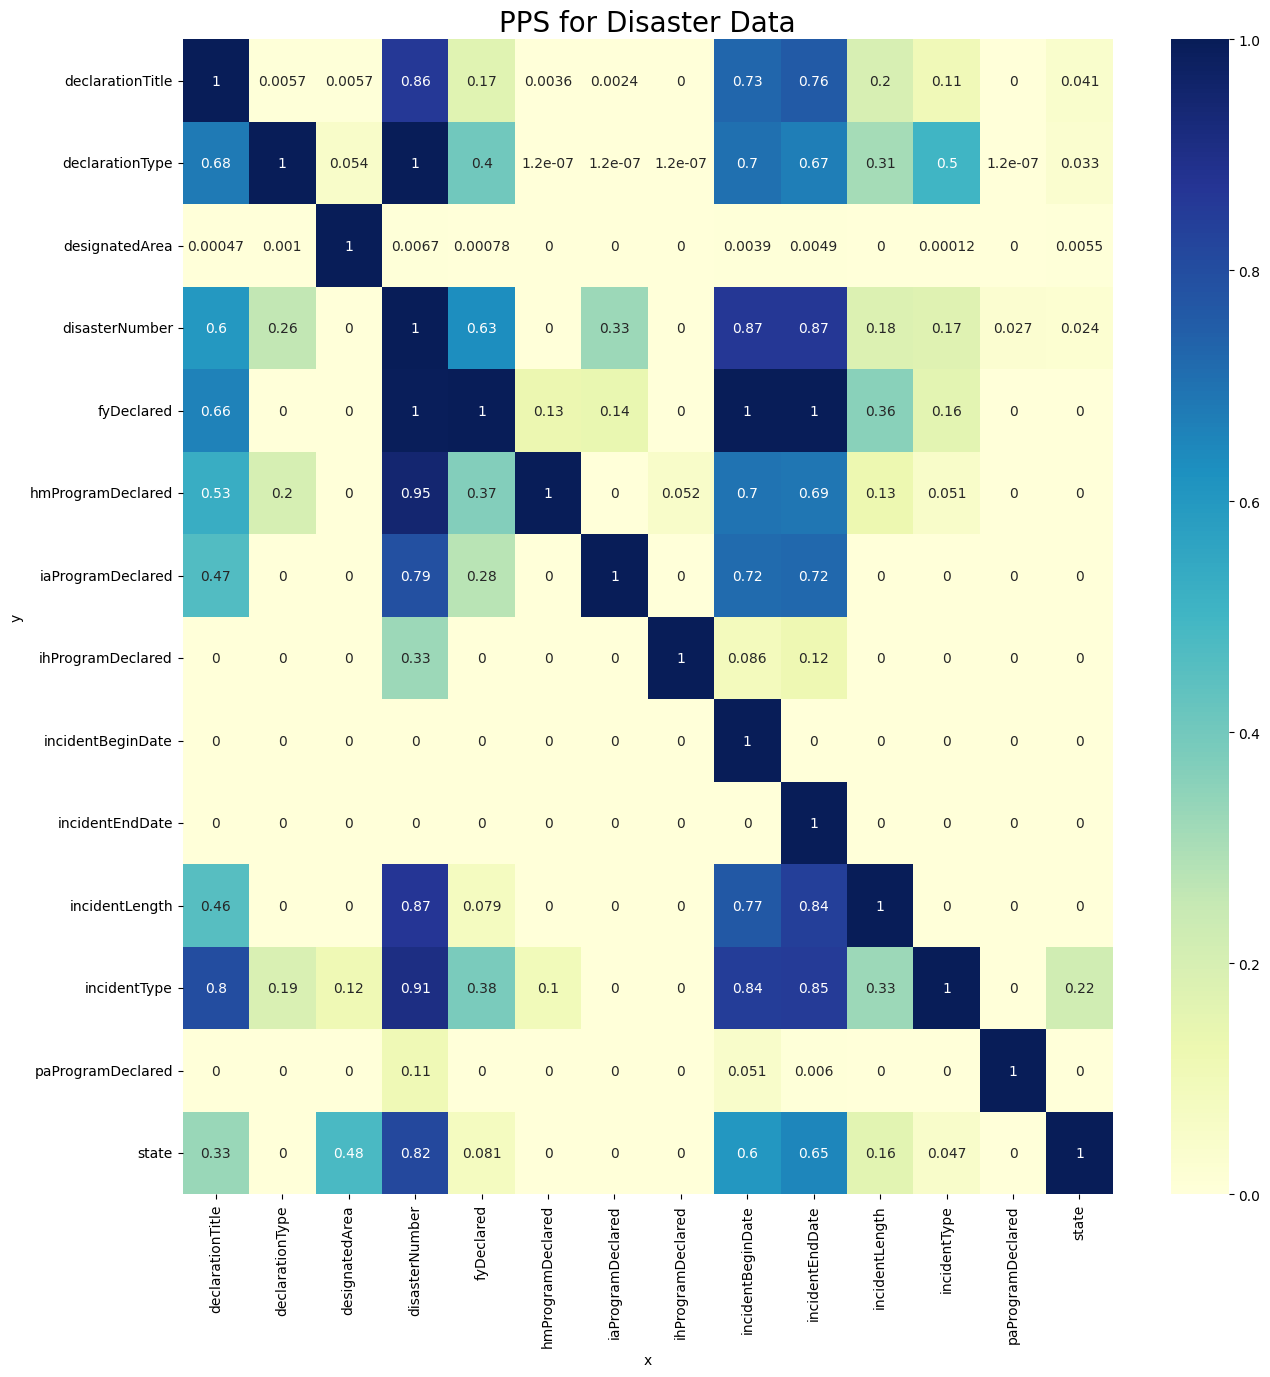

In [21]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(matrix_df, annot = True, cmap = 'YlGnBu')
ax.set_title("PPS for Disaster Data", fontsize = 20)
plt.show

C:\Users\colem\AppData\Local\Temp\ipykernel_4064\2306862231.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')


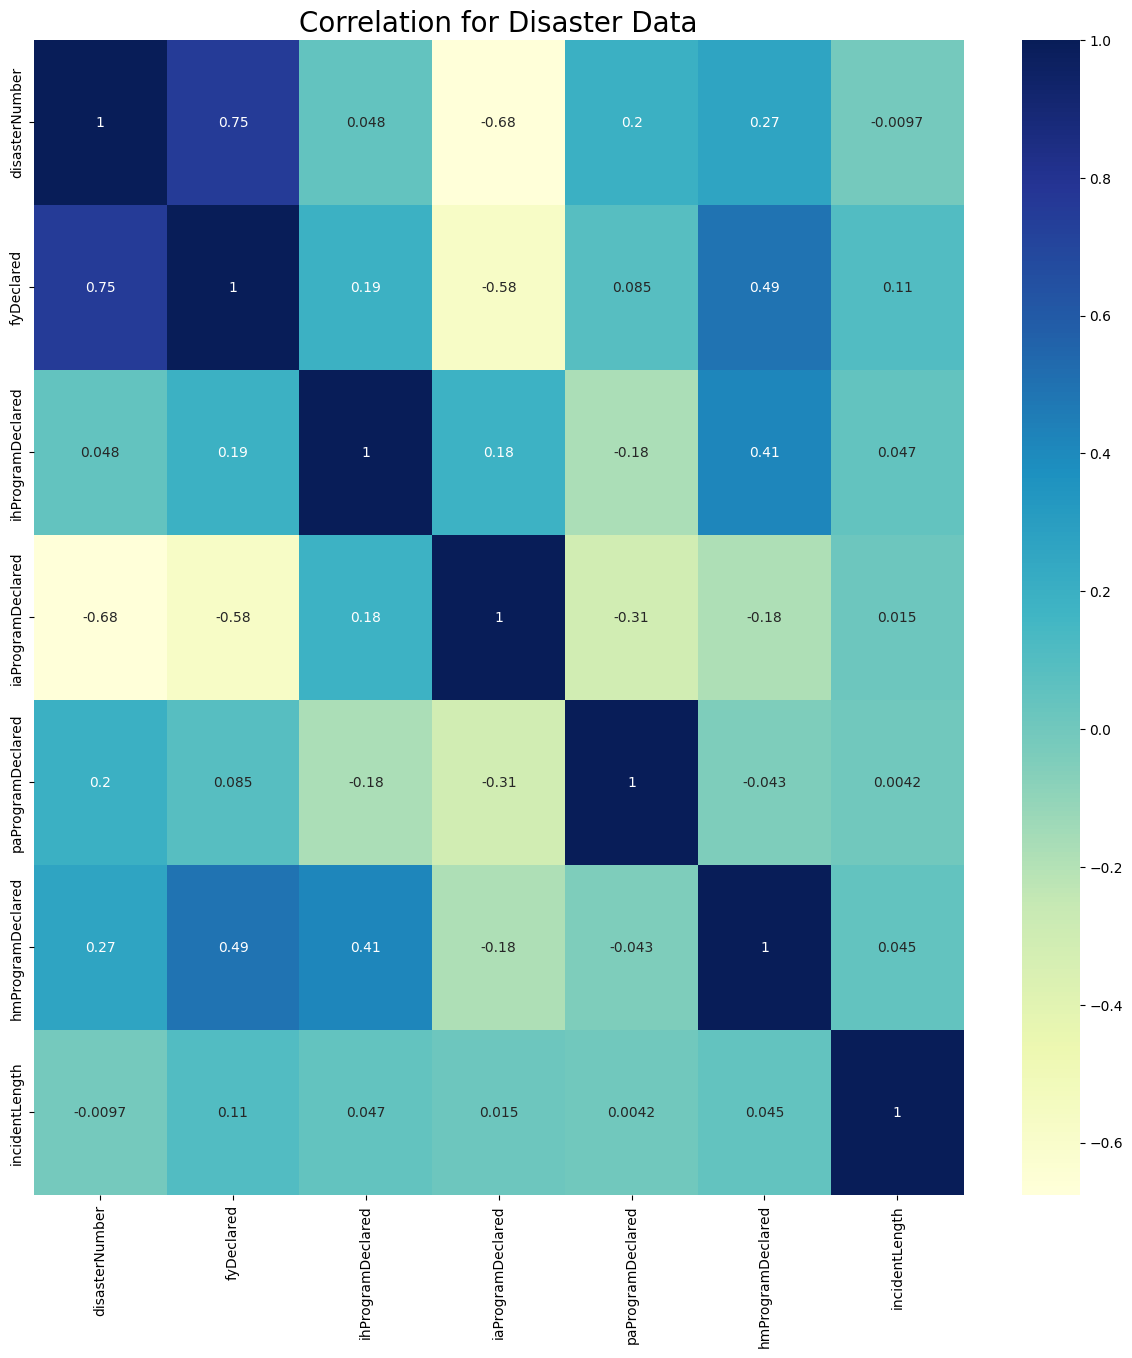

In [22]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
ax.set_title("Correlation for Disaster Data", fontsize = 20)
plt.show()

C:\Users\colem\AppData\Local\Temp\ipykernel_4064\1649234407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(), annot = True, linewidth = .1).fig.suptitle('Clustered Correlation for Disaster Data', fontsize = 20, y = 1.01)


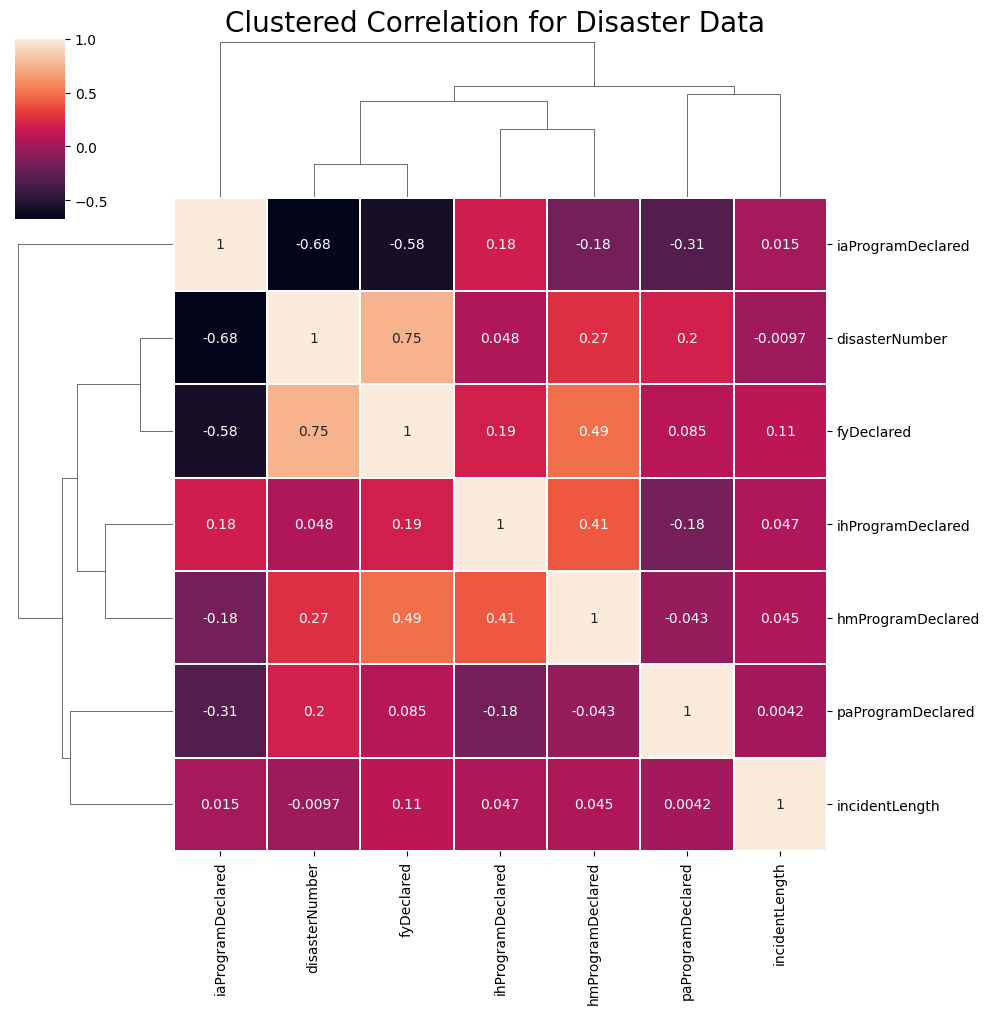

In [23]:
sns.clustermap(df.corr(), annot = True, linewidth = .1).fig.suptitle('Clustered Correlation for Disaster Data', fontsize = 20, y = 1.01)
plt.show()

In [24]:
df.to_csv(r'C:\Users\colem\OneDrive\Documents\Springboard\Disaster_Project\disaster_df_eda.csv', index = False)